# **4º Período: Classificação de Imagens com Redes Neurais Convolucionais (CNNs)**

> Pedro Henrique Monteiro Nascimento
>
> 241011582
>
> nascimento.monteiro@aluno.unb.br
>
> **Tópico Escolhido**: Redes Neurais Convolucionais (CNNs)
>
> **Referência Principal**: Atividade "Treinamento CIS 4º Período - Redes Neurais Convolucionais"

***

## Fundamentos de Redes Neurais Convolucionais

O coração de uma CNN é a **camada convolucional**. Diferente de uma camada `Dense`, onde cada neurônio se conecta a todas as entradas, a camada convolucional opera de forma local. Ela utiliza "filtros" ou "kernels", que são pequenas matrizes de pesos, que deslizam sobre a imagem de entrada.

Cada filtro é especializado em detectar um padrão específico, como uma borda vertical, uma cor específica ou uma textura. Ao deslizar sobre a imagem, o filtro gera um **mapa de características** (*feature map*), que indica onde na imagem aquele padrão específico foi encontrado.

### Componentes Chave de uma CNN

* **Camada de Pooling:** Após uma camada convolucional, é comum aplicar uma camada de `pooling` (geralmente `MaxPooling`). Sua função é reduzir as dimensões espaciais (largura e altura) dos mapas de características. Isso tem dois benefícios principais:
    1.  Reduz a quantidade de parâmetros e a carga computacional.
    2.  Torna a representação das características mais robusta a pequenas variações na posição do objeto na imagem.
* **Batch Normalization:** É uma técnica aplicada entre as camadas para normalizar a saída da camada anterior. Isso estabiliza e acelera o processo de treinamento, permitindo o uso de taxas de aprendizado mais altas e tornando a rede menos sensível à inicialização dos pesos.
* **Camadas `Dense` (Totalmente Conectadas):** Após várias camadas convolucionais e de pooling extraírem os mapas de características, esses mapas 2D são "achatados" (`Flatten`) em um único vetor 1D. Esse vetor é então alimentado a uma ou mais camadas `Dense` (como em uma rede neural padrão) que atuam como um classificador final, usando as características extraídas para tomar a decisão final (ex: classificar a imagem como "gato" ou "cachorro").

## Implementação: Classificação com CIFAR-10


1.  **Pré-processamento e *Data Augmentation***: Para o conjunto de treino, aplicamos transformações aleatórias como rotações e inversões horizontais. Essa técnica, `Data Augmentation`, cria novas amostras de treinamento a partir das existentes, o que ajuda a rede a generalizar melhor e a reduzir o overfitting. Para os dados de teste, aplicamos apenas a normalização padrão.
2.  **Arquitetura da CNN "do Zero"**: O código implementa uma CNN sequencial. A arquitetura segue um padrão comum: um bloco de `Conv2d` -> `ReLU` -> `BatchNorm2d` -> `MaxPool2d` é repetido para construir uma hierarquia de features. No final, um classificador com camadas `Dropout` e `Linear` (`Dense`) realiza a classificação final nas 10 classes do CIFAR-10.
3.  **Treinamento**: O modelo é compilado com o otimizador `Adam` e a função de custo `CrossEntropyLoss`, padrão para tarefas de classificação multiclasse. O loop de treinamento itera sobre os dados, ajustando os pesos da rede para minimizar o erro.

## Transfer Learning: Aproveitando o Conhecimento

`Transfer Learning` é uma das técnicas mais poderosas e eficientes em visão computacional. Utilizamos um modelo (como a `ResNet18`) que já foi pré-treinado em um dataset massivo, como o ImageNet (com mais de 1 milhão de imagens). A intuição é que as camadas iniciais desse modelo já aprenderam a ser excelentes extratores de características universais (bordas, texturas, formas, etc.), que são úteis para quase qualquer tarefa de visão computacional.

### Congelamento de Camadas (*Freezing Layers*)

O processo implementado no código segue os passos clássicos do Transfer Learning:
1.  **Carregar um modelo pré-treinado:** `models.resnet18(weights='IMAGENET1K_V1')`.
2.  **Congelar os pesos:** Percorremos todas as camadas do modelo e definimos `param.requires_grad = False`. Isso impede que os pesos já aprendidos sejam alterados durante o nosso treinamento inicial.
3.  **Substituir o classificador:** Removemos a camada de classificação final do ResNet (que foi treinada para as 1000 classes do ImageNet) e a substituímos por uma nova camada `Linear` com 10 saídas, correspondente às classes do CIFAR-10.
4.  **Treinar apenas o novo classificador:** Ao treinar o modelo, apenas os pesos da nova camada (a única que não está "congelada") são atualizados. Isso é muito mais rápido e eficiente do que treinar a rede inteira.

### Comparação de Resultados

A atividade também exige a avaliação de métodos de regularização.
* **Data Augmentation:** Como mencionado, é a primeira e uma das mais eficazes formas de regularização, aplicada diretamente nos dados de treinamento.
* **Dropout:** Implementado na CNN "do zero", o `Dropout` previne que a rede se torne muito dependente de neurônios específicos, forçando-a a aprender representações mais distribuídas e robustas.
* **Batch Normalization:** Além de estabilizar o treino, a `BatchNorm` também introduz um pequeno ruído que age como um leve regularizador.


Usando o dispositivo: cpu


100%|██████████| 170M/170M [00:03<00:00, 43.6MB/s]


Classes do dataset: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

--- Treinando a CNN 'do zero' ---
Epoch 1/20 -> Val Acc: 0.5671
Epoch 2/20 -> Val Acc: 0.6157
Epoch 3/20 -> Val Acc: 0.6515
Epoch 4/20 -> Val Acc: 0.6616
Epoch 5/20 -> Val Acc: 0.6779
Epoch 6/20 -> Val Acc: 0.6926
Epoch 7/20 -> Val Acc: 0.7027
Epoch 8/20 -> Val Acc: 0.7283
Epoch 9/20 -> Val Acc: 0.7329
Epoch 10/20 -> Val Acc: 0.7370
Epoch 11/20 -> Val Acc: 0.7476
Epoch 12/20 -> Val Acc: 0.7499
Epoch 13/20 -> Val Acc: 0.7478
Epoch 14/20 -> Val Acc: 0.7515
Epoch 15/20 -> Val Acc: 0.7360
Epoch 16/20 -> Val Acc: 0.7638
Epoch 17/20 -> Val Acc: 0.7614
Epoch 18/20 -> Val Acc: 0.7579
Epoch 19/20 -> Val Acc: 0.7613


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


Epoch 20/20 -> Val Acc: 0.7705

--- Usando Transfer Learning com ResNet18 ---


100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


Epoch 1/5 -> Val Acc: 0.3698
Epoch 2/5 -> Val Acc: 0.3954
Epoch 3/5 -> Val Acc: 0.3951
Epoch 4/5 -> Val Acc: 0.3945
Epoch 5/5 -> Val Acc: 0.4084

--- Relatorio de Classificacao para: CNN do Zero ---
              precision    recall  f1-score   support

       plane       0.74      0.86      0.80      1000
         car       0.88      0.90      0.89      1000
        bird       0.79      0.62      0.69      1000
         cat       0.62      0.56      0.59      1000
        deer       0.79      0.72      0.75      1000
         dog       0.66      0.74      0.69      1000
        frog       0.77      0.89      0.82      1000
       horse       0.86      0.83      0.84      1000
        ship       0.89      0.86      0.87      1000
       truck       0.85      0.85      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



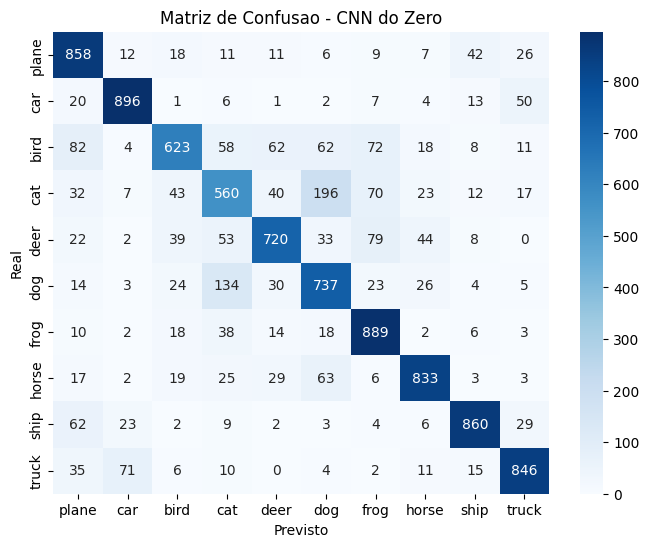


--- Relatorio de Classificacao para: Transfer Learning (ResNet18) ---
              precision    recall  f1-score   support

       plane       0.44      0.42      0.43      1000
         car       0.59      0.32      0.42      1000
        bird       0.32      0.47      0.38      1000
         cat       0.35      0.34      0.35      1000
        deer       0.43      0.35      0.39      1000
         dog       0.41      0.41      0.41      1000
        frog       0.52      0.48      0.50      1000
       horse       0.53      0.40      0.46      1000
        ship       0.43      0.53      0.47      1000
       truck       0.41      0.52      0.46      1000

    accuracy                           0.43     10000
   macro avg       0.44      0.43      0.43     10000
weighted avg       0.44      0.43      0.43     10000



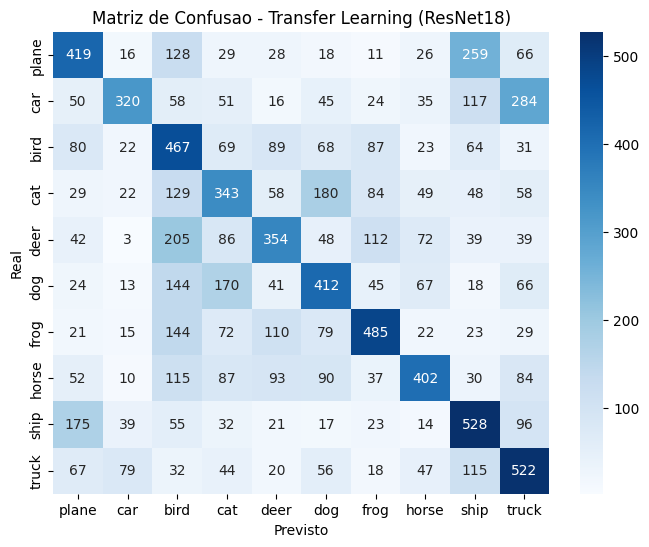


--- Conclusao da Comparacao ---
O modelo de Transfer Learning alcanca uma acuracia significativamente maior com muito menos epocas de treino.
Isso ocorre porque ele utiliza o conhecimento pre-adquirido de um dataset massivo (ImageNet) para extrair features,
enquanto o modelo 'do zero' precisa aprender tudo a partir de um dataset relativamente pequeno.


In [2]:
# --- 1. CONFIGURACAO DO AMBIENTE ---

# instalando as bibliotecas necessarias
!pip install torch torchvision torchaudio numpy matplotlib pandas scikit-learn seaborn -q

import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# checar se o hardware eh gpu, o que acelera muito o treino
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando o dispositivo: {device}")


# --- 2. PRE-PROCESSAMENTO E CARREGAMENTO DOS DADOS (AGORA AUTOMATICO) ---

# Data Augmentation e Normalizacao para o conjunto de treino
# isso cria novas imagens 'fake' rotacionando, invertendo, etc., o que ajuda a evitar overfitting
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalizacao para CIFAR-10
])

# para o conjunto de teste, so normalizamos, sem data augmentation
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# baixando e criando os datasets CIFAR-10 automaticamente
# o pytorch cuida de tudo
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

# o CIFAR-10 nao tem um set de validacao separado, vamos criar um dividindo o de treino
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, validation_dataset = random_split(full_train_dataset, [train_size, val_size])

# criando os DataLoaders para carregar os dados em lotes (batches)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# pegando os nomes das classes do CIFAR-10
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(f"Classes do dataset: {class_names}")


# --- 3. TAREFA (ii) e (iv): CNN DO ZERO COM REGULARIZACAO ---

# definindo a arquitetura da nossa cnn para imagens 32x32 do CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), # 32x32 -> 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2), # 16x16 -> 8x8
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# funcao de treino e validacao generica
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # validacao
        model.eval()
        val_loss, val_corrects = 0.0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_epoch_acc = val_corrects.double() / len(val_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs} -> Val Acc: {val_epoch_acc:.4f}")

# instanciando e treinando o modelo "do zero"
print("\n--- Treinando a CNN 'do zero' ---")
model_scratch = SimpleCNN(num_classes=len(class_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_scratch.parameters(), lr=0.001)
train_model(model_scratch, criterion, optimizer, train_loader, validation_loader, epochs=20)


# --- 4. TAREFA (iii): TRANSFER LEARNING ---

print("\n--- Usando Transfer Learning com ResNet18 ---")

# carregando um modelo pre-treinado (resnet18)
model_transfer = models.resnet18(weights='IMAGENET1K_V1')

# "congelando" os pesos das camadas convolucionais
for param in model_transfer.parameters():
    param.requires_grad = False

# substituindo a ultima camada (o classificador) por uma nova para o nosso problema
num_ftrs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_ftrs, len(class_names))

model_transfer = model_transfer.to(device)

optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(), lr=0.001)
train_model(model_transfer, criterion, optimizer_transfer, train_loader, validation_loader, epochs=5)


# --- 5. AVALIACAO FINAL E COMPARACAO ---

# funcao para avaliar o modelo no conjunto de teste final
def evaluate_final_model(model, data_loader, model_name):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print(f"\n--- Relatorio de Classificacao para: {model_name} ---")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f'Matriz de Confusao - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# avaliando os dois modelos no conjunto de teste
evaluate_final_model(model_scratch, test_loader, "CNN do Zero")
evaluate_final_model(model_transfer, test_loader, "Transfer Learning (ResNet18)")

print("\n--- Conclusao da Comparacao ---")
print("O modelo de Transfer Learning alcanca uma acuracia significativamente maior com muito menos epocas de treino.")
print("Isso ocorre porque ele utiliza o conhecimento pre-adquirido de um dataset massivo (ImageNet) para extrair features,")
print("enquanto o modelo 'do zero' precisa aprender tudo a partir de um dataset relativamente pequeno.")